In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:

def load_api_key(filename="../data/key.txt"):
    with open(filename, 'r') as file:
        key = file.readline().strip()
        if not key:
            raise ValueError("El archivo key.txt está vacío")
        return key

def get_market_dominance():
    api_key = load_api_key()
    url = "https://api.coingecko.com/api/v3/global"
    headers = {
        "accept": "application/json",
        "x-cg-demo-api-key": api_key
    }

    response = requests.get(url, headers=headers)
    response.raise_for_status()
    data = response.json()

    dominance = data['data']['market_cap_percentage']
    df = pd.DataFrame(list(dominance.items()), columns=['coin', 'dominance_percentage'])
    df.sort_values(by='dominance_percentage', ascending=False, inplace=True)

    csv_path = "../data/market_dominance.csv"
    df.to_csv(csv_path, index=False)

    plt.figure(figsize=(10, 8))
    sns.barplot(
        x='dominance_percentage',
        y='coin',
        hue='coin',             
        data=df,
        dodge=False,
        palette='rainbow',
        legend=False            
    )
    plt.title('Dominio de mercado por Criptomoneda')
    plt.xlabel('Dominio de Mercado (%)')
    plt.ylabel('Criptomoneda')
    plt.tight_layout()
    plt.show()


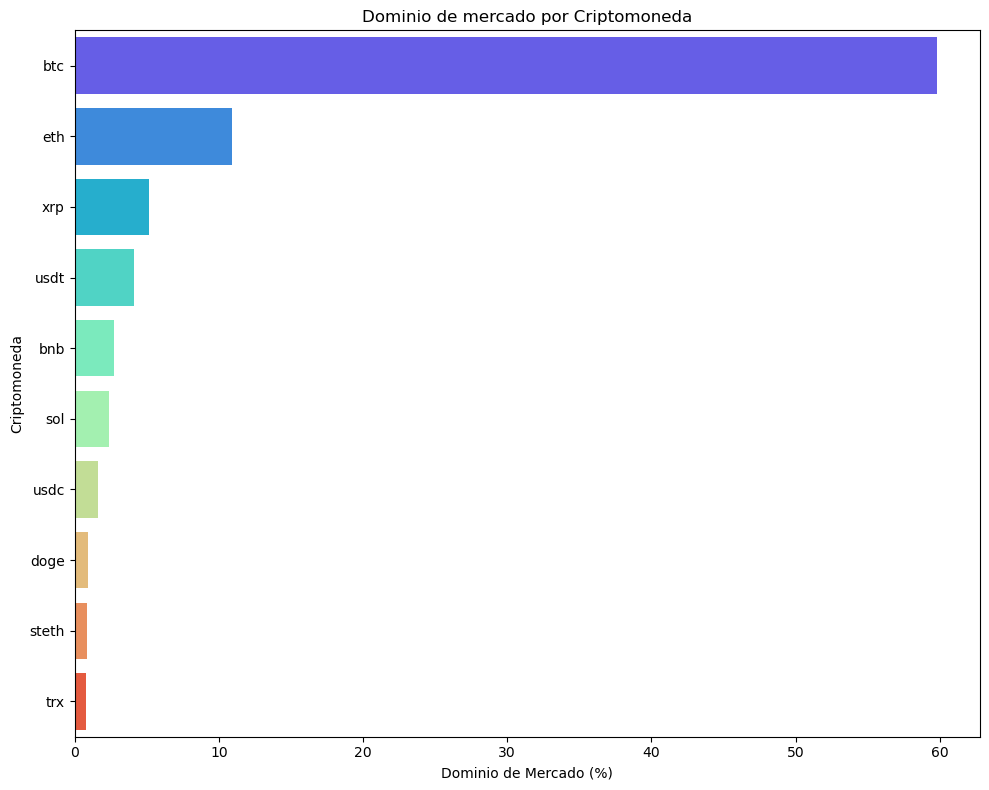

In [5]:
get_market_dominance()